# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## Задача 1
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

<center><h1>Решение задачи 1</h1></center>

Пусть целевая переменная имеет <a href=https://en.wikipedia.org/wiki/Laplace_distribution>распределение Лапласа</a>, то есть ее функция плотности задается, как $\rho(x|\mu, \sigma) = 	{\displaystyle {\frac {1}{2\sigma}}\exp \left(-{\frac {|x-\mu |}{\sigma}}\right)}$, где $\mu \in R_{+}$  и $\sigma \in R$ -  некоторые параметры. Также имеет место быть постановка предположения, что $y_{true} = y_{pred}(x, w) + \epsilon$, где $\epsilon$ - ошибка, имеющая распределение $Laplace(\mu_{\epsilon}, \sigma_{\epsilon})$, то тогда y_{true} также случайная величина, но имеющая распределение с параметрами $\mu = \mu_{\epsilon} + y_{pred}$ и $\sigma = \sigma_{\epsilon}$.

Пусть формально у нас есть какая-то выборка данных $Y$, которая состоит из некоторого набора элементов $\{y_i\}_{i=1}^n$, и, предполагая, что данные у нас независимо и одинаково распределенные с распределением Лапласа, зависящие от некоторого, возможно многомерного, параметра $\theta$, можно вывести оптимальную оценку этого параметра. Ниже будет представлен вывод оценки через **оценку максимального правдоподобия** и **максимизацию апостериорного распределения**.

## Оценка максимального правдоподобия
Данный подход оценивает параметр $\theta$ через следующую цепочку рассуждений:
$$
\theta_{MLE} =
argmax(\rho(Y|\theta)) =
argmax(\rho(y_1, y_2...y_n|\theta)) =
argmax(\prod\limits_{i=1}^n\rho(y_i|\theta)) =
argmax(\sum\limits_{i=1}^n\log(\rho(y_i|\theta))),
$$
Соответственно, если $Y$ порождены распределением Лапласа, то при подстановке соответствующей функции плотности получим:

$$\theta_{MLE}= argmax(-n\log (2\sigma)-\frac{1}{\sigma}\sum_{t=1}^N |x_t-\mu - y^i_{pred}(\theta)|),$$ а так как экстремум ищется по $\theta$, то данная задача эквивалентна следующей (при условии также, что $\mu = 0$, а $\sigma = 1$:
$$\theta_{MLE} = argmin(\sum\limits_{i=1}^n|y_i - y^i_{pred}|),$$
что и является в чистом виде $MAE$.

## Оценка апостериорного максимума 
Теперь помимо выше сделанных предположений о $Y$, также предположим, что $\theta \sim Laplace(\mu_{\theta}, \sigma_{\theta})$ (что есть априорным распределением).
Тогда, опираясь на метод максимизации апостериорного распределения будем искать $\theta_{MAP}$, как решение задачи:
$$\theta_{MAP} = argmax(\rho(\theta | Y)),$$
что в силу формулы Байеса  принимает вид:
$$\theta_{MAP} = 
argmax(\rho(\theta | Y)) = 
argmax(\frac{\rho(Y | \theta) \rho(\theta)}{  \rho(Y) }) = 
argmax(\rho(Y | \theta) \rho(\theta)) = 
argmax(log(\rho(Y | \theta)) + log(\rho(\theta))) = 
argmax(\sum\limits_{i=1}^n log(\rho(y_i | \theta) + log(\rho(\theta)))
$$
Если брать во внимание сделанные предположения о $\theta$ и $Y$:
$$\theta_{MAP} = 
argmax( -n\log (2\sigma)-\frac{1}{\sigma}\sum_{t=1}^N |x_t-\mu - y^i_{pred}(\theta)| -n\log (2\sigma_{\theta}) - \sum\limits_{i=1}^n |\theta_{i}|)
$$
что и при соответствующих парематрах модели (среднего и дисперсии), дает следующую задачу:
$$\theta_{MLE} = argmin(\sum\limits_{i=1}^n|y_i - y^i_{pred}| + \sum\limits_{i=1}^n |\theta_{i}|),$$
а это ничто иное как $MAE$ с $L^1$ - регуляризацией.

## Задача 2
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи +
- (текст) формулировка признакового описания объектов +
- (текст, формулы) формулировка модели многослойного перцептрона +
- (текст, формулы) формулировка функции ошибки +
- (текст, формулы) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной; +
- отдельные экземпляры выборки в виде изображений; +
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

<center><h1>Решение задачи 2</h1></center>



# Теоретические сведения

## Общая постановка задачи
В данном задании требуется реализовать модель *трехслойного перцептрона*. В этом случае подразумевается, что первым слоем будет слой входных данных, затем один скрытый, который переходит в слой с ответом нашей модели.

Задача связана с *классификацией* картинок из датасета **MNIST**. Требуется настроить алгоритм, который будет оптимально каждой картинке 28х28 ставить в соответствие некоторое число, которое на ней изображено.

В общем виде, многослойный перцептрон можно определить следующим образом:

$$
\begin{equation}
    \begin{cases}
    h_1 = \psi_1(\theta_1^T \cdot \phi_1(x))
    \\
    h_2 = \psi_2(\theta_2^T  \cdot \phi_2(h_1))
    \\
    \vdots
    \\
    h_k = \psi_k(\theta_k^T \cdot \phi_k(h_{k-1}))
    \\
    y = \psi_{k+1}(\theta_{k+1}^T \cdot \phi_{k+1}(h_k))
    \end{cases}
\end{equation}
$$

где $x$ - объект (в нашем случае, это картинка с числом), $\phi_i$ - basic function (фактически, некоторые преобразования над данными, например, нормировка), $\theta_i$ - матрица параметров, по которым будет происходить оптимизация, $\psi_i$ - activation function (какая-то нелинейная функция, для того чтобы $y$ задававал в итоге нелинейное отображение), $y$ - предсказание целевой метки (то есть для данной задачи - это предположительное число на картинке)

Либо же в более человеческом виде:
$$
y = y(h_k(h_{k-1}(h_{k-2}(...h_1(x)))))
$$

То есть многослойный перцептрон - это всего лишь сложная функция.

В нашей задаче:
- $X$ - это множество векторов из $R^{784}$, то есть это "плоское" представление матриц 28х28 (то есть каждая строка этой матрицы конкатенируется с предыдущей и в итоге получается вектор размера 784).


- $Y$ - one-hot вектор длиной 10, где единица стоит на месте с координатой истинной метки, а предсказанием алгоритма является вектор из вероятнотстей принадлежности каждому клаассу. Далее определим, каким образом получить эти самые вероятности


## Функция активации на выходном слое и функция потерь
`SoftMax` - обобщение сигмоида на многоклассовую классификацию. Так как хочется интерпретировать ответ алгоритма как вероятность, то `SoftMax` с этим отлично справляется, так как определяется следующим образом:
$$
y_{pred} = 
\begin{bmatrix} 
P(t=0 | \mathbf{z}) \\
\vdots \\
P(t=9 | \mathbf{z}) \\
\end{bmatrix}
= \begin{bmatrix} 
\varsigma(\mathbf{z})_0 \\
\vdots \\
\varsigma(\mathbf{z})_9 \\
\end{bmatrix}
= \frac{1}{\sum_{d=0}^9 e^{z_d}}
\begin{bmatrix} 
e^{z_0} \\
\vdots \\
e^{z_9} \\
\end{bmatrix}
$$, 
где $\varsigma(z)_c  := \frac{e^{z_c}}{\sum_{d=0}^9 e^{z_d}}$

Также на *backward-проходе* нам предстоит уметь вычислять производную `Softmax`-a по параметрам. Формально, это можно сделать следюущим образом:
$$
\begin{split}
\text{если} \; i = j :& \frac{\partial y_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_{0-9}}}{\partial z_i} = \frac{e^{z_i}\Sigma_{0-9} - e^{z_i}e^{z_i}}{\Sigma_{0-9}^2} = \frac{e^{z_i}}{\Sigma_{0-9}}\frac{\Sigma_{0-9} - e^{z_i}}{\Sigma_{0-9}} = \frac{e^{z_i}}{\Sigma_{0-9}}(1-\frac{e^{z_i}}{\Sigma_{0-9}}) =  y_i (1 - y_i)\\
\text{если} \; i \neq j :& \frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_{0-9}}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_{0-9}^2} = -\frac{e^{z_i}}{\Sigma_{0-9}} \frac{e^{z_j}}{\Sigma_{0-9}} = -y_i y_j
\end{split}
$$, 
где $\Sigma_{0-9} := \sum\limits_{d=0}^{9} e^{z_{d}}$

Так как ответ алгоритма воспринимается как верооятность, то логичным будет максимизировать правдоподобие. По аналогии с тем, как выводится `logloss` для бинарной классификации, можно вывести общий вид этой функции потерь, который и будет именоваться, как `Cross-entropy`:
$$
L(Y,Y_{pred}) = \sum_{i=1}^n l(\mathbf{y}_i,\mathbf{y}^{pred}_i) = -\sum_{i=1}^n \sum_{d=0}^{9} y_{id} \cdot \log( y^{pred}_{id})
$$,
где $n$ - размер минибатча.

## Описание метода оптимизации
В данной реализации полносвязной нейронной сети будем использовать градиентную оптимизацию, а именно `Nesterov momentum`. Это модификация стохастического градиентного спуска, которая формально реализуется следующим образом:

$$
\begin{equation}
    \begin{cases}
    m_t = m_{t - 1} \cdot \beta + \nabla_{\theta} L(\theta_{t-1}) \cdot (1 - \beta)
    \\
    \theta_t = \theta_{t-1} - \alpha \cdot m_t
    \end{cases}
\end{equation}
$$

Для шага оптимизации  надо знать значение импульса для каждого параметра, а как следствие уметь посчитать градиент по параметру. Для этого используют `back propagation` - метод вычисления градиента лосса по параметрам нейронной сети.<br>

Данный алгоритм крайне прост: <br>
Оптимизируемая фунция представляется в виде графа вычислений. Далее вводятся две операции работы с графом - прямой обход вершин (forward pass) и обратный (backward pass). На прямом обходе просто вычисляется значение функции, а на обратном вычисляются значения градиента лосса по параметру на каждом параметре для того чтобы произвести шаг оптимизации.

In [1]:
# Подгрузка основнвных модулей
import numpy as np
import pandas as pd

from abc import ABC, abstractmethod
from tqdm import tqdm
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from warnings import simplefilter
simplefilter('ignore')

In [2]:
# Подгрузка данных с разделением на обучаующую и тестовую выборки
mnist = np.load('./mnist.npz')

x_train = mnist['x_train']
y_train = mnist['y_train']

x_test = mnist['x_test']
y_test = mnist['y_test']

# Исследовательский анализ данных

## Визуализация данных
Для начала посмотрим, как буквально выглядят данные

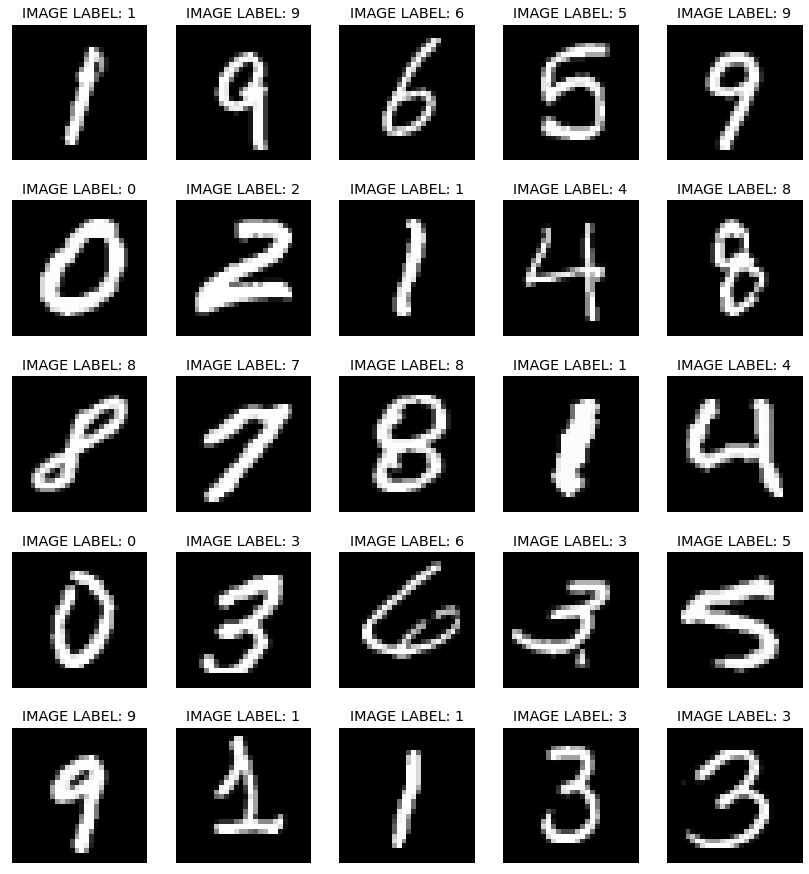

In [3]:
NUM = 5

fig, ax = plt.subplots(NUM, NUM, figsize=(10, 10))
plt.subplots_adjust(left=-0.2, bottom=-0.3)

for i in range(NUM**2):
    rand_num = np.random.randint(0, x_train.shape[0])
    
    ax[i // NUM, i % NUM].imshow(x_train[rand_num], cmap='gray',)
    ax[i // NUM, i % NUM].set_title(f'IMAGE LABEL: {y_train[rand_num]}')
    ax[i // NUM, i % NUM].set_xticks([])
    ax[i // NUM, i % NUM].set_yticks([])
    ax[i // NUM, i % NUM].grid(False)

## Предобработка данных 

In [4]:
print(f"shape тренировочной выборки: {x_train.shape}")
print(f"shape тестовой выборки: {x_test.shape}")
print(f"shape целевой метки на тренировке: {y_train.shape}")
print(f"shape целевой метки на тесте: {y_test.shape}")

shape тренировочной выборки: (60000, 28, 28)
shape тестовой выборки: (10000, 28, 28)
shape целевой метки на тренировке: (60000,)
shape целевой метки на тесте: (10000,)


Как можно заметить, данные у нас представлены в виде 70000 матриц 28х28, причем значения в этих матрицах лежат в промежутке [0, 255].
Так как по условию задачи требуется реализовать полносвязную нейронную сеть, то на входной слой следует подавать вектор признаков, который является плоским представлением матриц 28х28 (то есть каждая строка этой матрицы конкатенируется с предыдущей и в итоге получатеся вектор размера 784).

Также, так как мы решаем задачу многоклассовой классификации, оптимизируя Cross-Entropy как функцию потерь (и используя Softmax, который возвращает вектор из вероятностей), то целевая метка должна быть не числом, а One-Hot вектором. 

Вдобавок, так как оптимизация градиентная, то нормализуем данные на отрезок [0, 1] по формуле $x := \frac{x - x_{min}}{x_{max} - x_{min}}$

In [6]:
def make_normal(data):
    assert data.ndim == 2
    
    min_value = data.min(axis=0)
    max_value = data.max(axis=0)
    
    return (data - min_value) / (max_value - min_value + 1e-100)


def make_flat(data):
    flat_data = data.reshape(data.shape[0], -1)
    
    assert flat_data.shape[1] == 784
    return flat_data


def make_one_hot(y, length=10):
    assert len(y.shape) == 1
    
    one_hot_y = np.empty(shape=(y.shape[0], length))
    
    for ind, obj_label in enumerate(y):
        one_hot_y[ind] = np.array([1 if obj_label == i else 0 for i in range(length)])
        
    return one_hot_y



def preprocess_x(x):
    x_pr = make_normal(make_flat(x))
    
    return x_pr


def preprocess_y(y):
    y_pr = make_one_hot(y)
    
    return y_pr

In [7]:
x_train_pr = preprocess_x(x_train)
x_test_pr = preprocess_x(x_test)

y_train_pr = preprocess_y(y_train)
y_test_pr = preprocess_y(y_test)

## Табличная работа с данными
создадим из данных `pandas.DataFrame` для более удобного анализа. Таргет в таблице будет просто числом, а не one-hot, опять же, просто для удобства анализа.

In [8]:
columns = chain((f"pixel_{i}" for i in range(1, x_train_pr.shape[1] + 1)), ('target',))

df = pd.DataFrame(
    np.concatenate((x_train_pr, y_train[:, np.newaxis]), axis=1),
    columns=columns
)
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [9]:
df.describe()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784,target
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000350,0.000180,0.000076,0.000060,0.000032,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015576,0.011225,0.006667,0.006607,0.005590,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,9.000000


In [53]:
print(f'количество признаков с пустыми значениями: {(df.isna().sum() > 0).sum()}')

количество признаков с пустыми значениями: 0


## Удаление фиктивных признаков 
Есть смысл посмотреть, имеются ли среди данных пиксели, которые не меняют тональность на всех объектах

In [51]:
def remove_constant_pixels(dataframe):
    new_dataframe = dataframe.copy()
    
    for col in dataframe:
        if new_dataframe[col].min() == new_dataframe[col].max():
            new_dataframe.drop(columns=[col], inplace=True)
            
    return new_dataframe

In [52]:
df_wo_constant = remove_constant_pixels(df)

In [33]:
new.shape

(60000, 718)

In [50]:
def foo(x):
    x +=5
    
y = np.array([1, 1, 1, 1, 1])
foo(y)
y

array([6, 6, 6, 6, 6])

## Визуализация целевой переменной

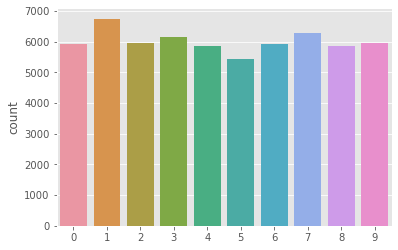

In [55]:
sns.countplot(y_train,  hue=None);

Видно, что данных каждого класса примерно поровну, поэтому в таком случае будет уместно использовать даже `accuracy`, как метрику качества 

## Разбиение данных на train и test

In [24]:
def make_train_test(X, y, train_size=0.8):
    perm = np.random.permutation(range(len(X)))
    train_indx = perm[:int(train_size * len(X))]
    test_indx = perm[int(train_size * len(X)):]
    
    return (
        X[train_indx], X[test_indx],
        y[train_indx], y[test_indx],
    )

# Реализация модели

In [34]:
class Differentiable(ABC):
    def __init__(self):
        self.state = None
        pass
    
    @abstractmethod
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    @abstractmethod
    def backward(self, **kwargs):
        raise NotImplementedError()

In [ ]:
class Loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Этот метод реализует вычисление значения функции потерь
        loss_value = 0.0
        self.state = 0.0
        
        log_pred = np.log(y_pred)
        loss_value = np.dot(y_true, log_pred)
                
        return loss_value
    
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        
        partial_grad = np.zeros_like(y_pred)
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad

In [ ]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = np.zeros(X.shape[1]+1)
            
            ### YOUR CODE HERE
            # self.theta = ...
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

In [ ]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.theta = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, **kwargs):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

In [ ]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, **kwargs):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

In [ ]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.modules = None
        self.parameters = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        grad = 0.0
                
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, **kwargs):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

In [ ]:
def train_loop(X, y, model, loss_fn, epochs=100):
    loss_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        # loss_value = ...
        # grad = ...
        # model.theta = ...
        
        loss_history.append(loss_value)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    
    return loss_history

In [ ]:
obj_fn = loss()
model = Perceptron()
loss_history = train_loop(Xtr, ytr, lr_model, obj_fn, epochs=1000)